In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [34]:
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000,n_features=3,n_classes=2,n_redundant=1,random_state=999,n_clusters_per_class=2)

In [35]:
x

array([[-0.33504974,  0.02852654,  1.16193084],
       [-1.37746253, -0.4058213 ,  0.44359618],
       [-1.04520026, -0.72334759, -3.10470423],
       ...,
       [-0.75602574, -0.51816111, -2.20382324],
       [ 0.56066316, -0.07335845, -2.15660348],
       [-1.87521902, -1.11380394, -4.04620773]])

In [36]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=42)

In [45]:
print("{0:0.2f}% data is in training set".format((len(xtrain)/len(x) * 100)),len(xtrain))
print("{0:0.2f}% data is in test set".format((len(xtest)/len(x)) * 100),len(xtest))
print("{0:0.2f}% data is in training set".format((len(ytrain)/len(y) * 100)),len(ytrain))
print("{0:0.2f}% data is in test set".format((len(ytest)/len(y)) * 100),len(ytest))

67.00% data is in training set 670
33.00% data is in test set 330
67.00% data is in training set 670
33.00% data is in test set 330


In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [48]:
ypred=knn.predict(xtest)

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score

In [60]:
print("precision_score-",precision_score(ytest,ypred))
print("Recall_score-",recall_score(ytest,ypred))
print(classification_report(ytest,ypred))

print("accuracy score:",accuracy_score(ytest,ypred))


precision_score- 0.9276315789473685
Recall_score- 0.8757763975155279
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       169
           1       0.93      0.88      0.90       161

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

accuracy score: 0.906060606060606


In [63]:

print(confusion_matrix(ypred,ytest))

[[158  20]
 [ 11 141]]


In [55]:
from sklearn import metrics

<Axes: >

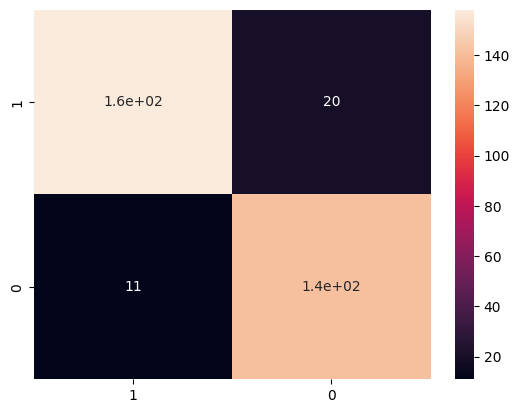

In [65]:
cm=metrics.confusion_matrix(ypred,ytest)
df_cm=pd.DataFrame(cm,index=[i for i in [1,0]],columns=[i for i in ["1","0"]])
sns.heatmap(df_cm,annot=True)

Lets create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.

In [86]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    predi=knn.predict(xtest)
    error_rate.append(np.mean(predi!=ytest))
    


Now create the following plot using the information from the above loop.

Text(0.5, 1.0, 'error_rate vs k_value')

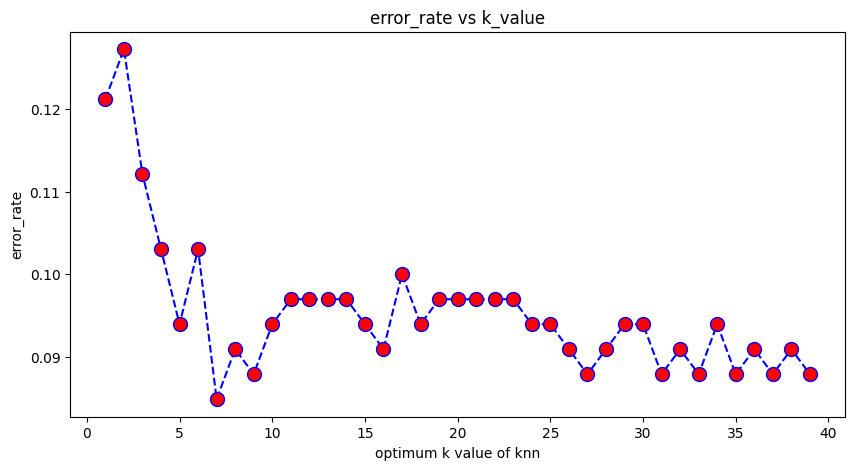

In [96]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate,color="blue",marker="o",markerfacecolor="red",linestyle="dashed",markersize=10)
plt.ylabel("error_rate")
plt.xlabel("optimum k value of knn")
plt.title("error_rate vs k_value")

Identifying the Optimum KThe Lowest Error Point:

The absolute minimum error rate in this plot occurs at $K = 7$. At this point, the error rate drops significantly to approximately 0.085.

The Stabilizing Region: After $K = 7$, the error rate spikes back up and fluctuates. However, it hits another local minimum at $K = 9$ and eventually reaches a very stable low plateau around $K = 27$ and $K = 31$.

Text(0.5, 1.0, 'test_score vs k_value')

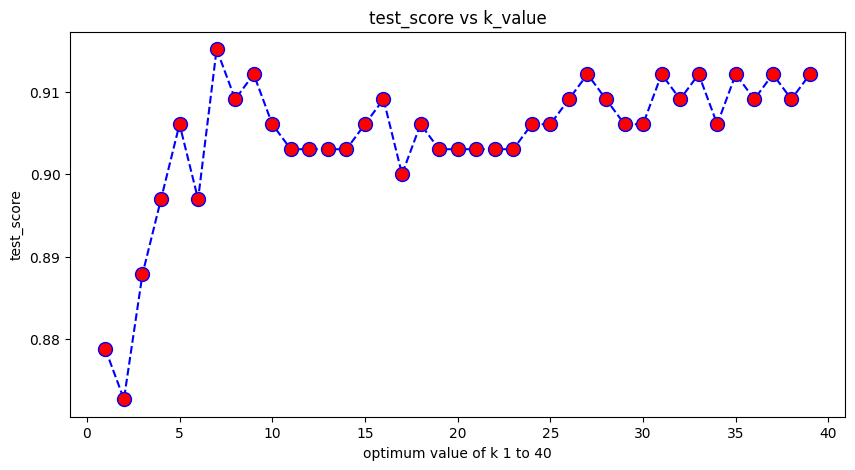

In [95]:
test_score=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    knni=knn.predict(xtest)
    test_score.append(knn.score(xtest,ytest))
    
    
plt.figure(figsize=(10,5))
plt.plot(range(1,40),test_score,color="blue",marker="o",linestyle="dashed",markerfacecolor="red",markersize=10)
plt.xlabel("optimum value of k 1 to 40")
plt.ylabel("test_score")
plt.title("test_score vs k_value")

Identifying the Optimum 
$K$Based on the accuracy scores in the plot:

The Global Maximum: The highest peak occurs at $K = 7$. At this value, your accuracy jumps to its highest point (roughly 0.915 or 91.5%).

A Secondary Peak: There is another high point at $K = 9$, though it is slightly lower than the score at $K = 7$.

## Hyperparameter Tuning And Cross Validation
## Grid SearchCV

In [97]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
print("precision_score-",precision_score(ytest,ypred))
print("Recall_score-",recall_score(ytest,ypred))
print(classification_report(ytest,ypred))

print("accuracy score:",accuracy_score(ytest,ypred))


precision_score- 0.9182389937106918
Recall_score- 0.906832298136646
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       169
           1       0.92      0.91      0.91       161

    accuracy                           0.92       330
   macro avg       0.92      0.91      0.92       330
weighted avg       0.92      0.92      0.92       330

accuracy score: 0.9151515151515152


In [98]:
from sklearn.model_selection import GridSearchCV

In [102]:
n_neighbors=[7,9,27,31]
weights=['uniform','distance']
algorithm=["auto","ball_tree","kd_tree","brute"]
metric=["euclidean","manhattan","chebyshev"]

In [103]:
params=dict(n_neighbors=n_neighbors,weights=weights,algorithm=algorithm,metric=metric)

In [104]:

clf=KNeighborsClassifier()
grid=GridSearchCV(clf,params,scoring="accuracy",cv=5)
grid.fit(xtrain,ytrain)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [7, 9, 27, 31],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [105]:
print(grid.best_params_)

{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}


In [106]:
print(grid.best_score_)

0.9029850746268657


In [110]:
knn=KNeighborsClassifier(algorithm='auto', metric="euclidean",n_neighbors=7, weights="uniform")
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
print("precision_score-",precision_score(ytest,ypred))
print("Recall_score-",recall_score(ytest,ypred))
print(classification_report(ytest,ypred))

print("accuracy score:",accuracy_score(ytest,ypred))

precision_score- 0.9182389937106918
Recall_score- 0.906832298136646
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       169
           1       0.92      0.91      0.91       161

    accuracy                           0.92       330
   macro avg       0.92      0.91      0.92       330
weighted avg       0.92      0.92      0.92       330

accuracy score: 0.9151515151515152


<Axes: >

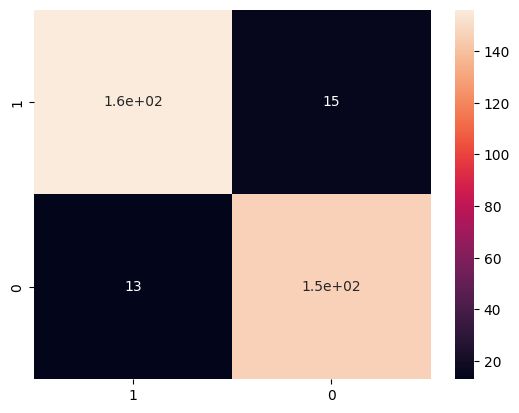

In [115]:
cm=metrics.confusion_matrix(ypred,ytest)
df_cm=pd.DataFrame(cm,index=[i for i in [1,0]],columns=[i for i in ["1","0"]])
sns.heatmap(df_cm,annot=True)